<a href="https://colab.research.google.com/github/ttatjanaa/ttatjanaa/blob/main/%D0%94%D0%97_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline

df3 = pd.read_csv('/content/df3 (1).csv')
print(len(df3))
print(df3.head())

500
       weekday  produced  defective
0     1.Monday        73          7
1    2.Tuesday        75         10
2  3.Wednesday        86          7
3   4.Thursday        64          7
4     5.Friday        70          6


1. Воссоздайте этот график разброса «произведенных» и «дефектных» деталей. Обратите внимание на цвет и размер точек. Также обратите внимание на размер картинки. Сможете ли растянуть его аналогичным образом?

In [ ]:
df3.defective

0       7
1      10
2       7
3       7
4       6
       ..
495     8
496    10
497     7
498     6
499     5
Name: defective, Length: 500, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'defective')

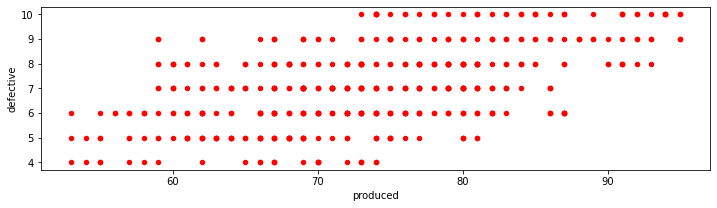

In [ ]:
plt.figure(figsize=(12,3))
plt.scatter(df3.produced, df3.defective, c = 'red', s=20)
plt.xlabel("produced")
plt.ylabel("defective")

2. Создайте гистограмму для колонки 'produced'

Text(0, 0.5, 'Frequency')

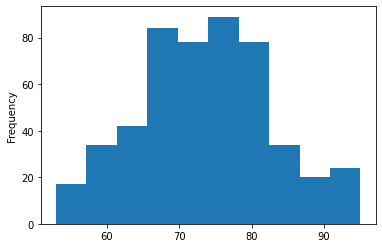

In [ ]:
plt.hist(df3.produced)
plt.ylabel("Frequency")

3. Перерисуйте гистограмму как на рисунке ниже

(55.0, 95.0)

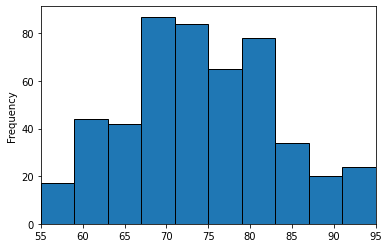

In [ ]:
plt.hist(df3.produced, edgecolor='black', range=[55, 95]) #задаем цвет контура бара и min/max точки гистограммы
plt.ylabel("Frequency") #название оси X
plt.xlim([55, 95]) #ограничение оси X

4. Создайте boxplot для 'produced' в каждый из дней недели 'weekday' (используйте группировку)

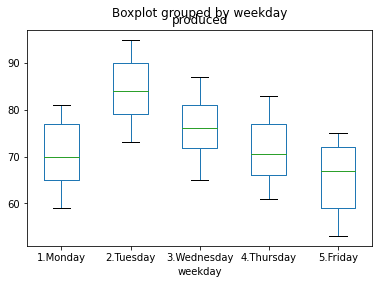

In [ ]:
df3.boxplot(column='produced',by='weekday',grid=False)

5.Создайте KDE (ядерная оценка плотности) для колонки 'defective'

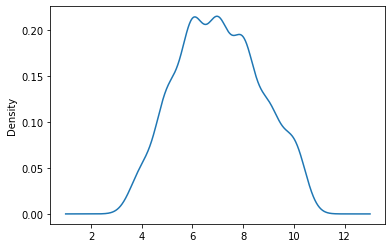

In [ ]:
df3.defective.plot.kde()

6. Видоизмените график KDE, как на рисунке ниже

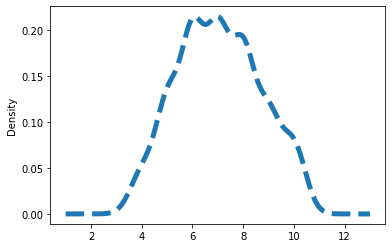

In [ ]:
df3.defective.plot.kde(linewidth=5, linestyle = 'dashed')

7. Для первых 30 строк постройте графики областей «произведенных» и «дефектных» деалей. (используйте .loc)

In [ ]:
df_new = df3.loc[:30,['defective','produced']]
df_new.head()

,defective,produced
0,7,73
1,10,75
2,7,86
3,7,64
4,6,70


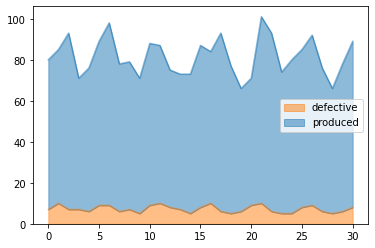

In [ ]:
df_new.plot.area(alpha=0.5, color = ['#ff7f0e','#1f77b4'])


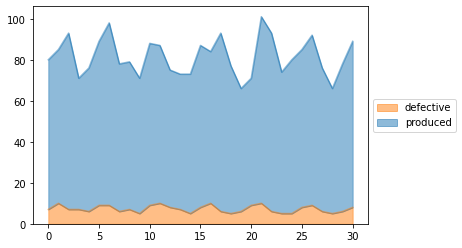

In [ ]:
df_new.plot.area(alpha=0.5, color = ['#ff7f0e','#1f77b4'])
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5))

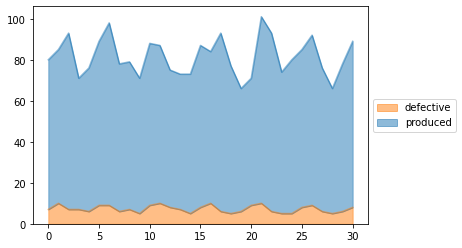

In [ ]:
df_new.plot.area(alpha=0.5, color = ['#ff7f0e','#1f77b4'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Доп. задание из лекции

Задача: создать бимодальный набор данных, среднее значение которого меньше медианы, нарисуйте гистограмму

Набор данных должен иметь:

1. 2 пика (2 нормальных распределения с одним пиком, объеденные в один массив)

2. отрицательный перекос (mean < median)

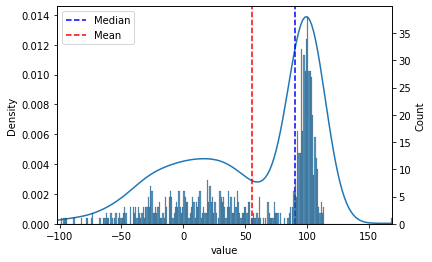

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

N=400
mu, sigma=100, 5

mu2, sigma2=10, 40

X1=np.random.normal(mu, sigma, N)
X2=np.random.normal(mu2, sigma2, N)
X=np.concatenate([X1, X2])
df=pd.DataFrame(X, columns=["value"])
fig, ax1=plt.subplots()
sns.kdeplot(data=df, x="value", ax=ax1)
ax1.set_xlim((df["value"].min(), df["value"].max()))
ax2=ax1.twinx()
sns.histplot(data=df, x="value", discrete=True, ax=ax2)
ax1.axvline(np.median(X),color='b', linestyle='--', label="Median")
ax1.axvline(np.mean(X),color='r', linestyle='--', label="Mean")
ax1.legend()

In [ ]:
np.mean(X)

55.22434109850842

In [ ]:
np.median(X)

90.19384507602737